# Importing Dependencies

In [19]:
from skimage.io import imread , imshow
import matplotlib.pyplot as plt

# Sample Image Path

In [20]:
imageSamplePath = "./dataset/A/a1.jpg"
imageSample = imread(imageSamplePath ,  as_gray = True )

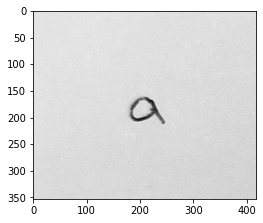

In [21]:
plt.figure(figsize = (4,4))
plt.imshow(imageSample , cmap="gray")
plt.show()

In [22]:
print(imageSample.shape)

(353, 419)


# Traversing All Images in dataset Directory

In [23]:
import os

In [24]:
mainDirectory = "./dataset"
alphabets = []

In [25]:
for i in os.listdir(mainDirectory):
    if(i != '.DS_Store'):
        aPath = os.path.join(mainDirectory + '/' + i)
        alphabets.append(aPath)

In [26]:
alphabets.sort()
print(alphabets)

['./dataset/A', './dataset/B', './dataset/C', './dataset/D', './dataset/E', './dataset/F', './dataset/G', './dataset/H', './dataset/I', './dataset/J', './dataset/K', './dataset/L', './dataset/M', './dataset/N', './dataset/O', './dataset/P', './dataset/Q', './dataset/R', './dataset/S', './dataset/T', './dataset/U', './dataset/V', './dataset/W', './dataset/X', './dataset/Y', './dataset/Z']


# Data Augmentation

In [41]:
from skimage.color import rgb2gray
from skimage.transform import rotate
from skimage.transform import AffineTransform
from skimage.transform import warp

In [43]:
augDirectory = "./augmentedDataset"

### 1. RGB to Grey Scale

In [44]:
for a in alphabets:
    temp = a
    aDir = temp.rsplit("/",1)[1]
    os.makedirs(os.path.join(augDirectory + '/' + aDir))
    imageName = aDir.lower()
    for c in os.listdir(a):
        if(c != '.DS_Store'):
            cPath = os.path.join(a + '/' + c)
            imageTemp = imread(cPath ,  as_gray = True , plugin='matplotlib')
            imageTemp = rgb2gray(imageTemp)
            imageName = c
            plt.imsave(augDirectory + '/' + aDir + '/' + imageName , imageTemp , cmap = "gray")

/var/folders/8x/4gmxn8sn7jxb31x4y2k0w5mw0000gn/T/ipykernel_4431/4141472321.py:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  imageTemp = rgb2gray(imageTemp)


### Display

In [38]:
img1 = imread("./dataset/A/a1.jpg")
img2 = imread("./augmentedDataset/A/a1.jpg")

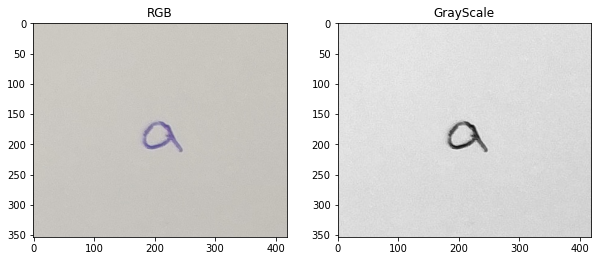

In [39]:
plt.figure(figsize = (10,10))
plt.subplot(1 , 2 , 1)
plt.title("RGB")
plt.imshow(img1)
plt.subplot(1 , 2 , 2)
plt.title("GrayScale")
plt.imshow(img2)
plt.show()

### 2. Position Augmentation

### Rotate

In [32]:
# for a in os.listdir(augDirectory):
#     if(a != '.DS_Store'):
#         letter = a
#         letter.lower()
#         count = 21
#         for c in os.listdir(augDirectory + '/' + a):
#             if(c != '.DS_Store'):
#                 cPath = os.path.join(augDirectory + '/' + a + '/' + c)
#                 imageTemp = imread(cPath , as_gray = True , plugin='matplotlib')
#                 rotateImg = rotate(imageTemp , angle = 30)
#                 rotateImg = rgb2gray(rotateImg)
#                 imageName = letter + str(count) + '.jpg'
#                 plt.imsave(augDirectory + '/' + a + '/' + imageName , rotateImg , cmap = "gray")
#                 count = count + 1

#             if(count == 41):
#                 break

### Display

In [33]:
# img1 = imread("./dataset/A/a1.jpg")
# img2 = imread("./augmentedDataset/A/a40.jpg")

In [34]:
# plt.figure(figsize = (10,10))
# plt.subplot(1 , 2 , 1)
# plt.title("Normal")
# plt.imshow(img1)
# plt.subplot(1 , 2 , 2)
# plt.title("Rotated")
# plt.imshow(img2)
# plt.show()

### Shear

In [45]:
for a in os.listdir(augDirectory):
    if(a != '.DS_Store'):
        letter = a
        letter.lower()
        count = 21
        for c in os.listdir(augDirectory + '/' + a):
            if(c != '.DS_Store'):
                cPath = os.path.join(augDirectory + '/' + a + '/' + c)
                imageTemp = imread(cPath , as_gray = True , plugin='matplotlib')
                tf = AffineTransform(shear = -0.1)
                shearImg = warp(imageTemp, tf, order=1, preserve_range=True, mode='wrap')
                shearImg = rgb2gray(shearImg)
                imageName = letter + str(count) + '.jpg'
                plt.imsave(augDirectory + '/' + a + '/' + imageName , shearImg , cmap = "gray")
                count = count + 1

            if(count == 41):
                break

/var/folders/8x/4gmxn8sn7jxb31x4y2k0w5mw0000gn/T/ipykernel_4431/3395353727.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  shearImg = rgb2gray(shearImg)


### Display

In [47]:
img1 = imread("./dataset/A/a1.jpg")
img2 = imread("./augmentedDataset/A/a40.jpg")

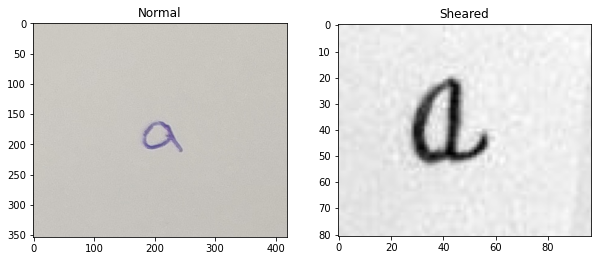

In [49]:
plt.figure(figsize = (10,10))
plt.subplot(1 , 2 , 1)
plt.title("Normal")
plt.imshow(img1)
plt.subplot(1 , 2 , 2)
plt.title("Sheared")
plt.imshow(img2)
plt.show()

### 3. Color Augmentation

### Contrast

In [46]:
for a in os.listdir(augDirectory):
    if(a != '.DS_Store'):
        letter = a
        letter.lower()
        count = 41
        for c in os.listdir(augDirectory + '/' + a):
            if(c != '.DS_Store'):
                cPath = os.path.join(augDirectory + '/' + a + '/' + c)
                imageTemp = imread(cPath , as_gray = True , plugin='matplotlib') / 255
                highContrastImg = imageTemp * 1.5
                imageName = letter + str(count) + '.jpg'
                plt.imsave(augDirectory + '/' + a + '/' + imageName , highContrastImg , cmap = "gray")
                count = count + 1

            if(count == 61):
                break

### Display

In [50]:
img1 = imread("./dataset/A/a1.jpg")
img2 = imread("./augmentedDataset/A/a60.jpg")

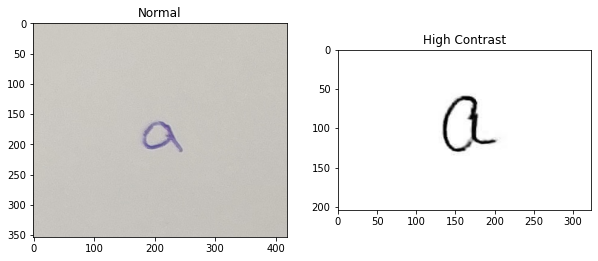

In [51]:
plt.figure(figsize = (10,10))
plt.subplot(1 , 2 , 1)
plt.title("Normal")
plt.imshow(img1)
plt.subplot(1 , 2 , 2)
plt.title("High Contrast")
plt.imshow(img2)
plt.show()

### Brightness